In [1]:
import sys

## find 'core' package
sys.path.insert(0, '../..')

sys.version

'3.7.3 (default, Mar 27 2019, 09:23:15) \n[Clang 10.0.1 (clang-1001.0.46.3)]'

In [2]:
import pandas as pd

from core.models import unit
from core.models.table import Table
from core.factories import column_factory

In [3]:
from core.generators.label_generator import LabelGenerator
from core.generators.unit_generator import UnitGenerator
from core.generators.column_generator import ColumnGenerator
from core.generators.table_generator import TableGenerator

In [4]:
vocab = [ c for c in 'abcdefghijklmnopqrstuvwxyz' ]

index_to_char = dict([ (i, c) for i, c in enumerate(vocab) ])
char_to_index = dict([ (c, i) for i, c in enumerate(vocab) ])

label_generator = LabelGenerator(index_to_char)
unit_generator = UnitGenerator(unit.get_unit_lookup())

column_generator = ColumnGenerator(label_generator, unit_generator)

In [5]:
table_1 = Table()

table_1.set_id('1')
table_1.n_spaces_between_columns = 5
table_1.max_number_of_labels = 10
table_1.columns = [ 
    column_factory.create_column(
        order = 0,
        min_label_length = 2,
        max_label_length = 12,
        max_unit_length = 6,
        max_number_of_label_parts = 4
    )
]

table_2 = Table()

table_2.set_id('2')
table_2.n_spaces_between_columns = 5
table_2.max_number_of_labels = 10
table_2.columns = [ 
    column_factory.create_column(
        order = 0,
        min_label_length = 2,
        max_label_length = 12,
        max_unit_length = 6,
        max_number_of_label_parts = 4
    ),
    column_factory.create_column(
        order = 1,
        min_label_length = 4,
        max_label_length = 15,
        max_unit_length = 6,
        max_number_of_label_parts = 3
    )
]

table_3 = Table()

table_3.set_id('3')
table_3.n_spaces_between_columns = 5
table_3.max_number_of_labels = 10
table_3.columns = [ 
    column_factory.create_column(
        order = 0,
        min_label_length = 2,
        max_label_length = 12,
        max_unit_length = 6,
        max_number_of_label_parts = 4
    ),
    column_factory.create_column(
        order = 1,
        min_label_length = 4,
        max_label_length = 15,
        max_unit_length = 6,
        max_number_of_label_parts = 3
    ),
    column_factory.create_column(
        order = 2,
        min_label_length = 2,
        max_label_length = 12,
        max_unit_length = 6,
        max_number_of_label_parts = 4
    )
]

In [6]:
table_lookup = {}

table_lookup[table_1.get_id()] = {
    'table': table_1,
    'table_generator': TableGenerator(table_1, column_generator),
}

table_lookup[table_2.get_id()] = {
    'table': table_2,
    'table_generator': TableGenerator(table_2, column_generator),
}

table_lookup[table_3.get_id()] = {
    'table': table_3,
    'table_generator': TableGenerator(table_3, column_generator),
}

In [7]:
_, x1, _ = table_lookup[table_1.get_id()]['table_generator'].get_table()
_, x2, _ = table_lookup[table_2.get_id()]['table_generator'].get_table()
_, x3, _ = table_lookup[table_3.get_id()]['table_generator'].get_table()

X = [
    x1,
    x2,
    x3
]

## max 3, only need two splits
y = [
    [-1, -1],
    [23, -1],
    [23, 49]
]

In [8]:
print('\n'.join(X[0]))

rh          1.09 m
aaxcuvzvllc
mjtthmhv
zpsy        4.75
drvumgrwem  cm
edpb gnklv  4.08
xuaijyawoc  cm
lggcfgmhq   1.63
kgg zvtasmn m/s



In [9]:
print('\n'.join(X[1]))

hbmzizrx    4.1 cm     ngrkdprwxzuxj  2.26
cdcpyy gjzd                           cm/s
tqgmfamj    2.8


In [10]:
print('\n'.join(X[2]))

nvf         0.87 m     omtlndmdxwb    3.35 m     dnirawjj    0.35
sgsm        1.89       mwngkqhi                              cm/s
            cm/s       rkwykszgrtj    0.22       xrbfmwtxbut 2.03
jkqhn yene  1.5        dbgweic        cm/s       jtptagra    m/s
edfkwpenf   m/s        jhznsafpwpbfe  0.66       xicykpnkv
htmrqhhey   1.81                      m/s        ajwlgvugd ed2.12
            cm/s       ykny           2.55                   cm/s
bticxbggq   2.58                      m/s        st          2.74 m
gjaeoymat   cm         ijknqomrc      2.5 cm     ujrbsxr     3.76 m
xkuvc                  jftprolpchkc              wamfnhyfz
                       odwcff         0.07       dsacw
                       dbaiuwzygt     cm         epkt hvwkyi 0.19 m
                                                 bhcv



In [11]:
import matplotlib.pyplot as plt

In [12]:
w = 0
h = 0
for key in table_lookup.keys():
    table = table_lookup[key]['table']
    
    width, height = table.get_max_size()
    
    if width > w:
        w = width
        
    if height > h:
        h = height

X_t = [ ]
for example in X:
    
    img = []
    for row in example:
        u = [ 0 if r == ' ' else 1 for r in row ]
        if len(u) < w:
            u = u + [ 0 for _ in range(w - len(u))]
            
        img.append(u)
        
    while len(img) < h:
        img.append([0 for _ in range(w)])

    X_t.append(img)

In [13]:
import numpy as np

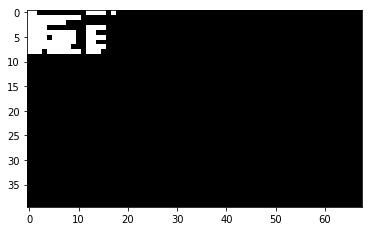

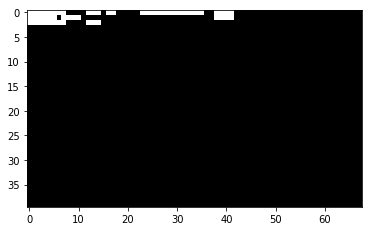

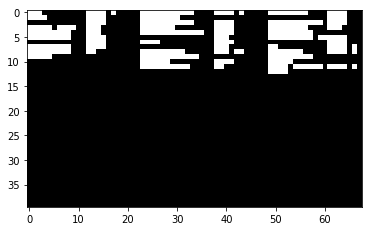

In [14]:
for example in X_t:
    plt.imshow(np.array(example), cmap='gray')
    plt.show()

In [15]:
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv1D, MaxPool1D, Dense, Dropout, Flatten

Using TensorFlow backend.


In [16]:
X_train = np.array(X_t)

In [17]:
X_train.shape[1:]

(40, 68)

In [18]:
y_train = np.array(y)

print(y_train)

[[-1 -1]
 [24 -1]
 [24 49]]


In [19]:
model = Sequential()

model.add(Conv1D(15, kernel_size=3, input_shape = X_train.shape[1:]))
model.add(MaxPool1D(3))

model.add(Flatten())

## number of units
units = y_train.shape[1]

model.add(Dense(units, activation='linear'))

In [20]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics = ['accuracy']
)

In [21]:
additional_iterations = 100

for iteration in range(additional_iterations):
    model.fit(X_train, y_train, epochs=25, verbose=0)

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 38, 15)            3075      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 12, 15)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 180)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 362       
Total params: 3,437
Trainable params: 3,437
Non-trainable params: 0
_________________________________________________________________


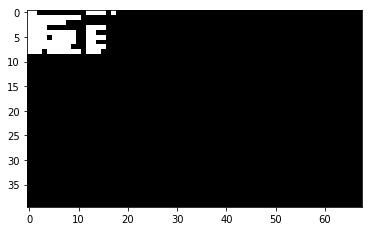

[-1.0, -1.0]

In [23]:
plt.imshow(X_train[0], cmap='gray')
plt.show()

[
    round(y)
    for y
    in model.predict(np.array([X_train[0]]))[0]
]

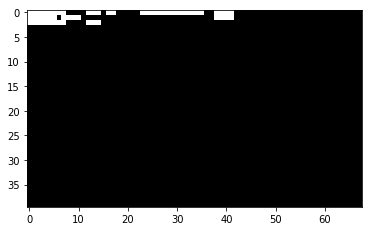

[24.0, -1.0]

In [24]:
plt.imshow(X_train[1], cmap='gray')
plt.show()

[
    round(y)
    for y
    in model.predict(np.array([X_train[1]]))[0]
]

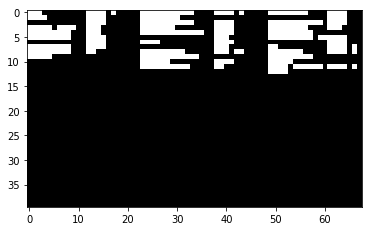

[24, 49]


In [25]:
plt.imshow(X_train[2], cmap='gray')
plt.show()

indexes = [
    int(y)
    for y
    in model.predict(np.array([X_train[2]]))[0]
]

print(indexes)

24
49


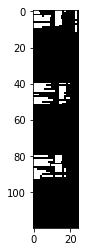

In [26]:
splits = []

previous_index = -1
for index in indexes:
    
    print(index)
    
    for row in X_train[2]:
        
        if previous_index > 0:
            splits.append(row[previous_index:index].tolist())
        else:
            splits.append(row[:index].tolist())
            
    previous_index = index
    
for row in X_train[2]:
    splits.append(row[index:].tolist())
    
_max = np.max([
    len(row)
    for row in splits
])

formatted = []
for row in splits:
    while len(row) < _max:
        row.append(0)
        
    formatted.append(row)
    
formatted = filter(lambda: np.sum(x) > 0, formatted)

plt.imshow(formatted, cmap='gray')
plt.show()